In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\BPS\Desktop\Minor Project\Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
#Group-based Imputation
data['society'] = data.groupby('location')['society'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

In [9]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
society           1
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [10]:
# Fill any remaining null in 'society' (rare cases)
data['society'].fillna('Unknown', inplace=True)

# Fill 'location' with 'Unknown' (only 1 missing)
data['location'].fillna('Unknown', inplace=True)

#Fill 'size' with the mode (most common value)
data['size'].fillna(data['size'].mode()[0], inplace=True)

# Fill 'bath' and 'balcony' with their median (numeric columns, skewed distributions)
data['bath'].fillna(data['bath'].median(), inplace=True)
data['balcony'].fillna(data['balcony'].median(), inplace=True)

In [11]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
numeric_col = data.select_dtypes(exclude='object')

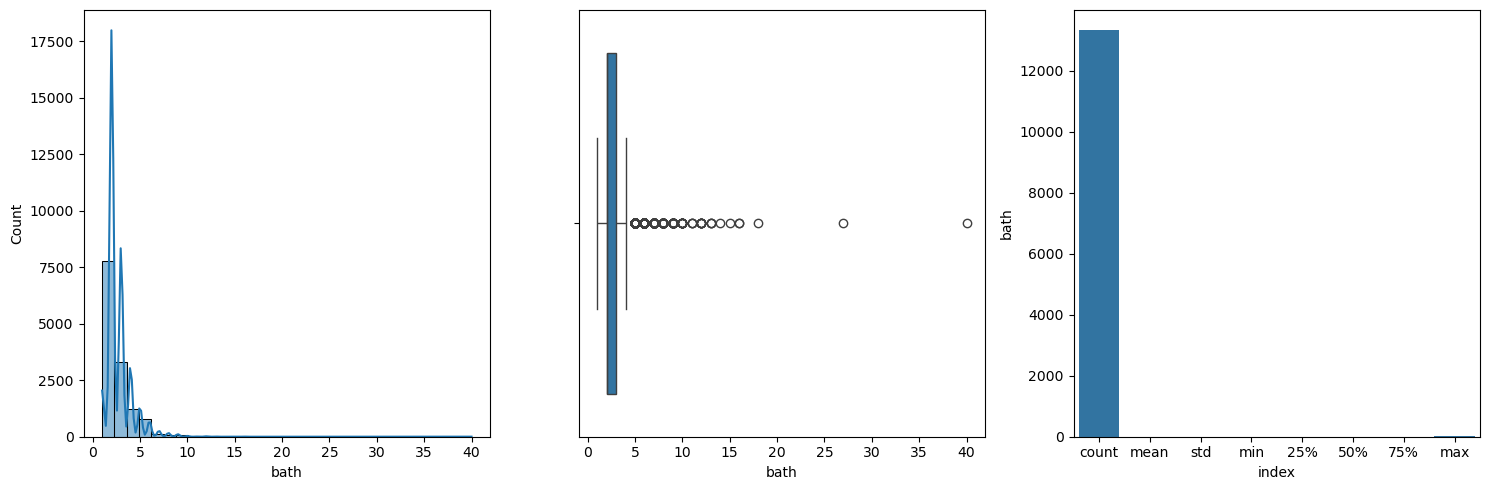

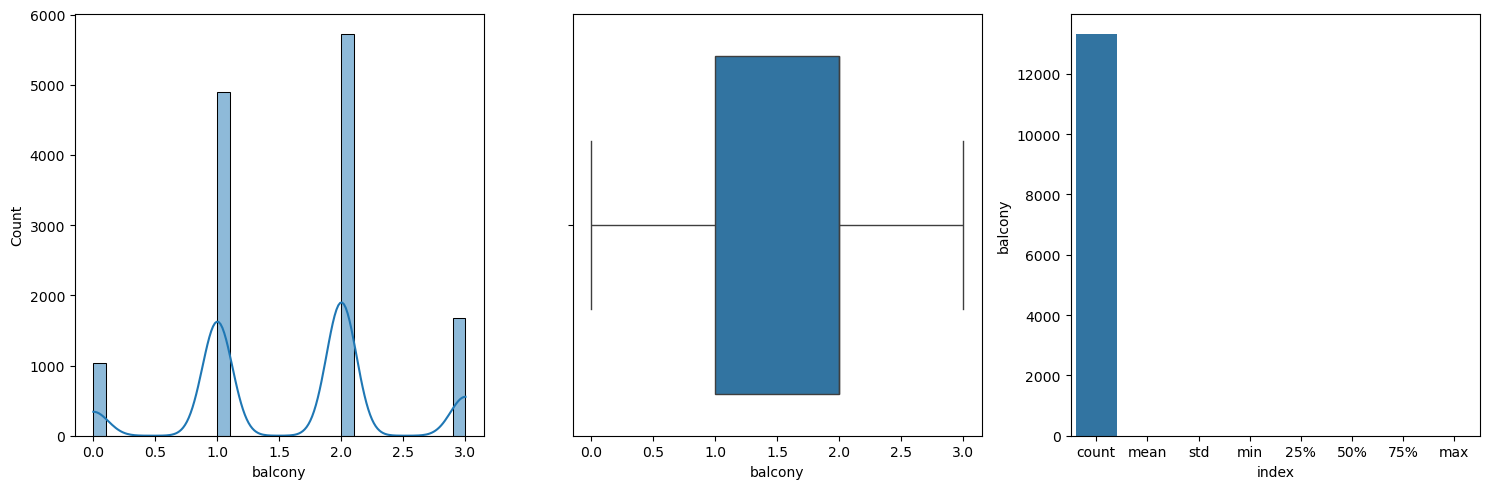

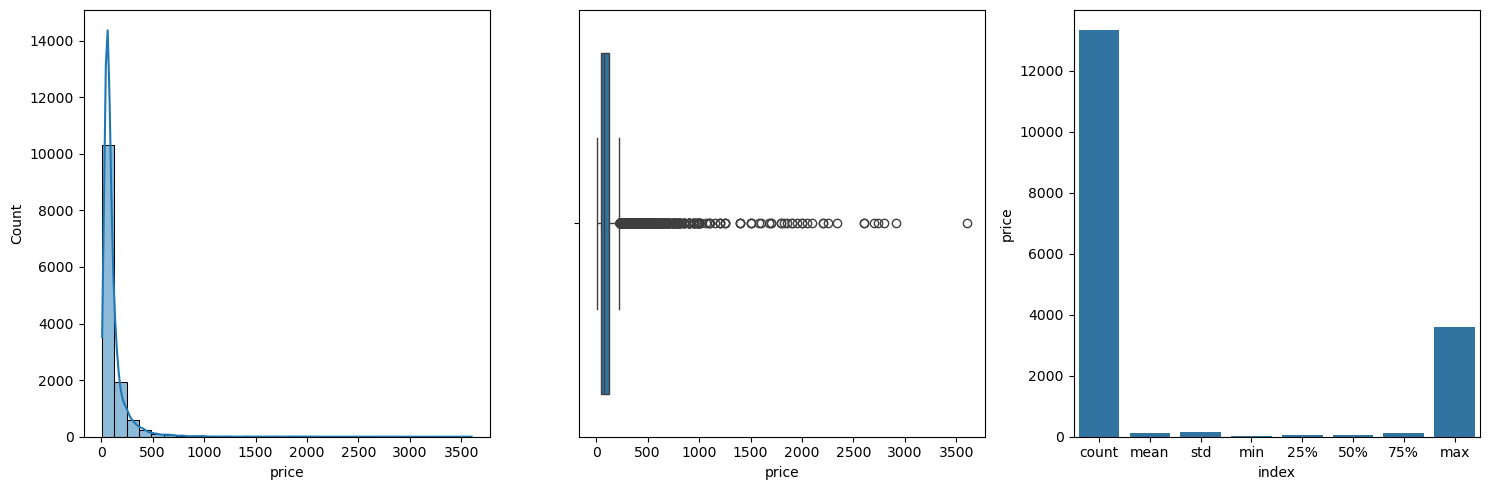

In [13]:
for col in numeric_col:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.histplot(data=data, x=col, bins=30, kde=True, ax=axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    sns.barplot(data=data[col].describe().reset_index(), x='index', y=col, ax=axs[2])
    
    plt.tight_layout()
    plt.show()

In [14]:
# Handling Outliers 
def find_boundry(df,variable):
    Q1 =df[variable].quantile(.25)
    Q3 =df[variable].quantile(.75)
    IQR = Q3 - Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry ,upper_boundry

In [15]:
find_boundry(data,'bath')

(np.float64(0.5), np.float64(4.5))

In [16]:
data.loc[(data['bath']<0.5)|(data['bath']>4.5)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,Unknown,1020,6.0,2.0,370.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,NRosete,600,9.0,2.0,200.0
...,...,...,...,...,...,...,...,...,...
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,Taonte,1500,6.0,2.0,145.0
13303,Plot Area,Ready To Move,Vidyaranyapura,5 Bedroom,DSestil,774,5.0,3.0,70.0
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,Unknown,1200,5.0,2.0,325.0
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,Vaharvi,1500,9.0,2.0,250.0


In [17]:
# data.loc[(data['bath']<0.5)|(data['bath']>4.5),'bath']=data['bath'].mean() but not recommended as the mean would be 2.7
median_bath = data['bath'].median()
data.loc[(data['bath'] < 0.5) | (data['bath'] > 4.5), 'bath'] = median_bath

In [18]:
# Log-transform the price column
# np.log1p is used to handle any 0 values safely (log(0+1) = 0)
data['price_log'] = np.log1p(data['price'])


In [19]:
numeric_col = data.select_dtypes(exclude='object')

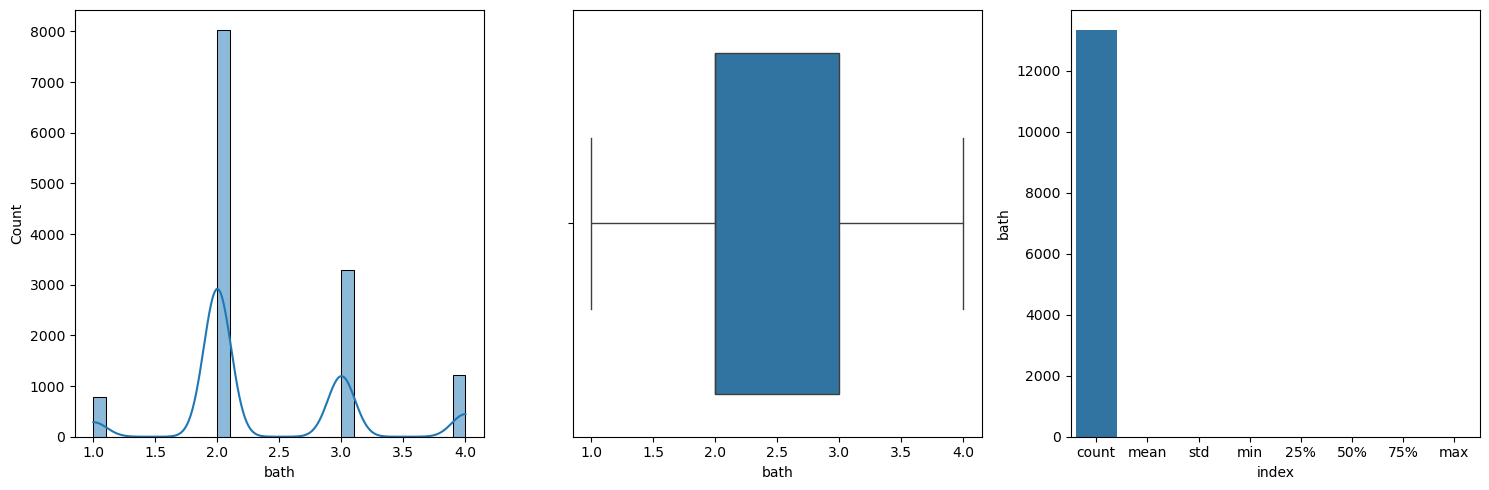

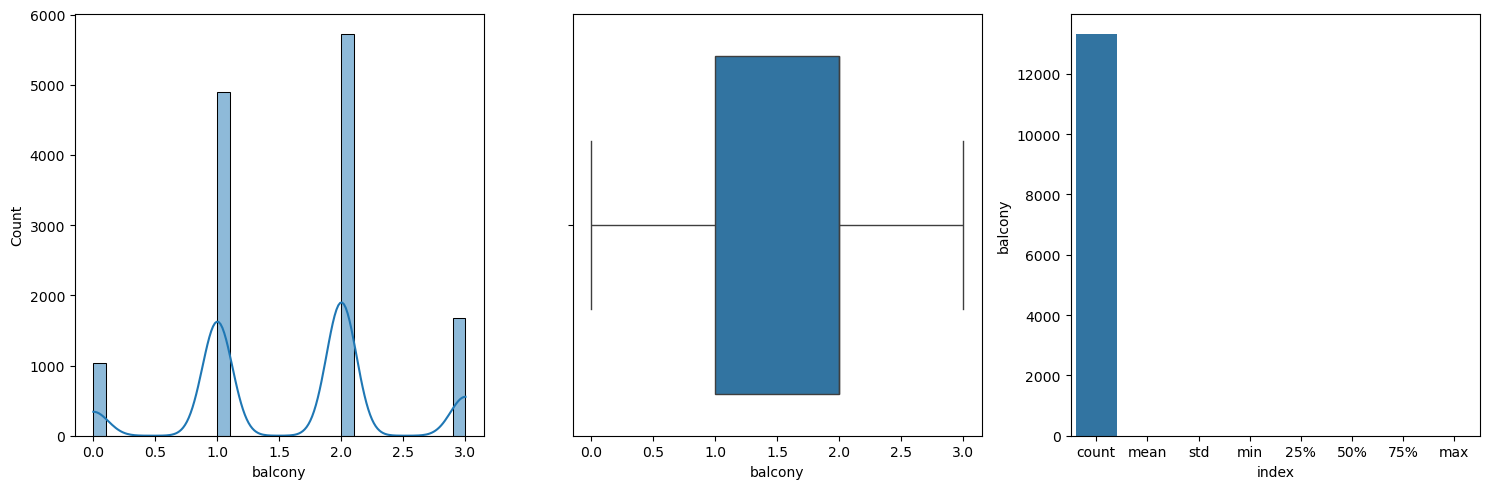

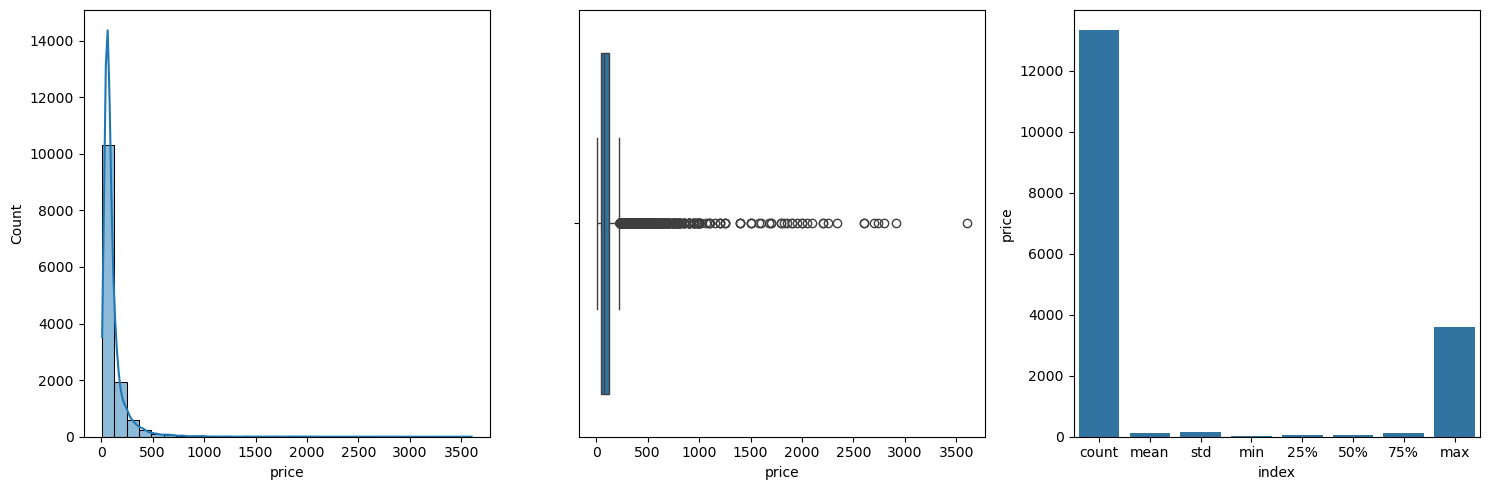

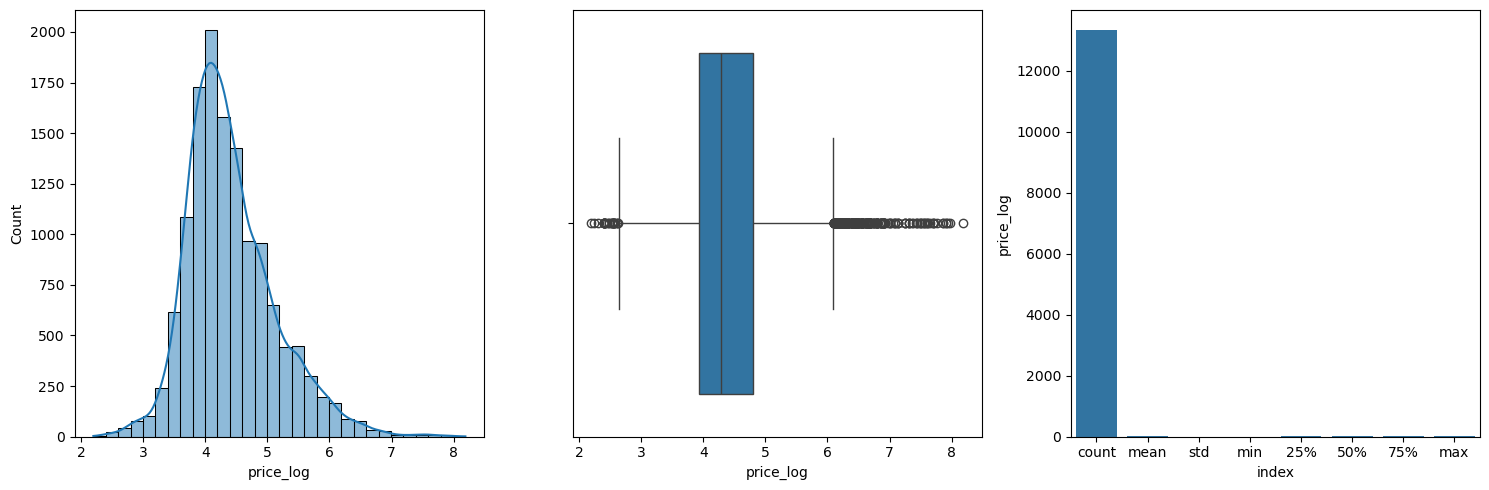

In [20]:
for col in numeric_col:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.histplot(data=data, x=col, bins=30, kde=True, ax=axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    sns.barplot(data=data[col].describe().reset_index(), x='index', y=col, ax=axs[2])
    
    plt.tight_layout()
    plt.show()

In [21]:
find_boundry(data,'price_log')

(np.float64(2.6358782634157025), np.float64(6.091737914905365))

In [22]:
lower_bound, upper_bound = 2.6358782634157025, 6.091737914905365
data['price_log'] = np.where(data['price_log'] > upper_bound, upper_bound, data['price_log'])
data['price_log'] = np.where(data['price_log'] < lower_bound, lower_bound, data['price_log'])

In [23]:
numeric_col = data.select_dtypes(exclude='object')

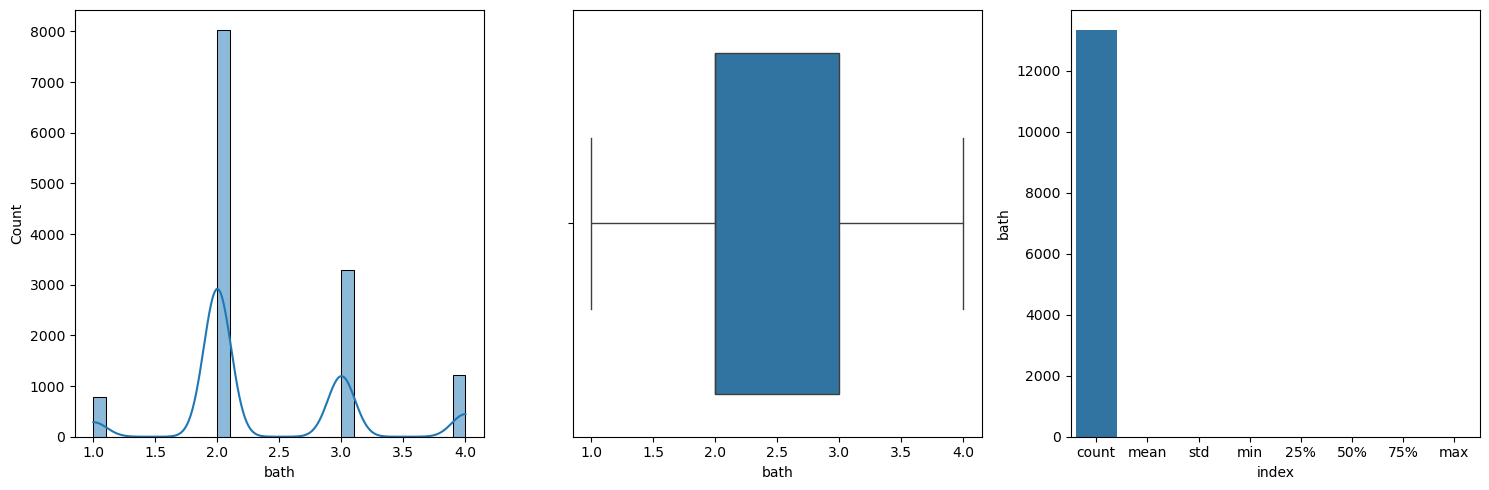

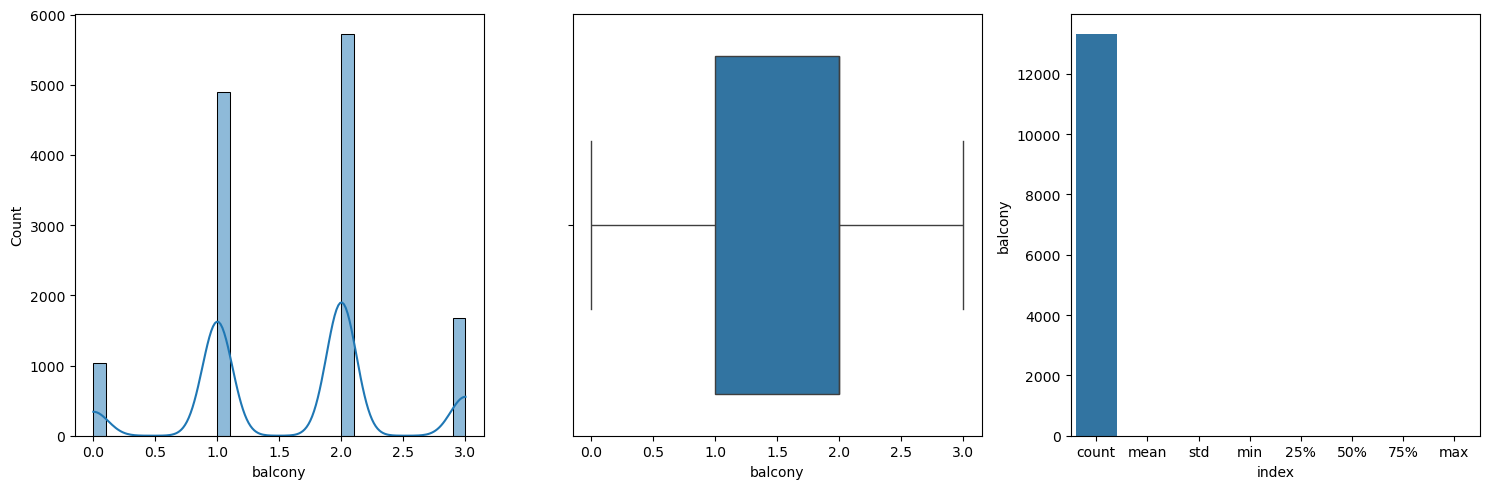

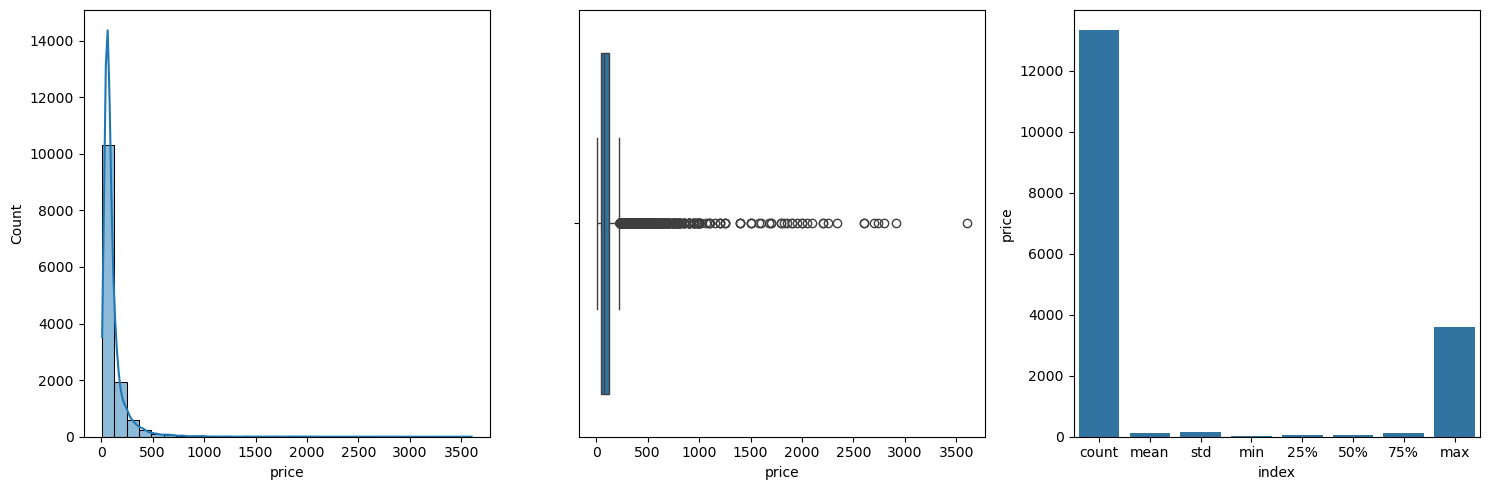

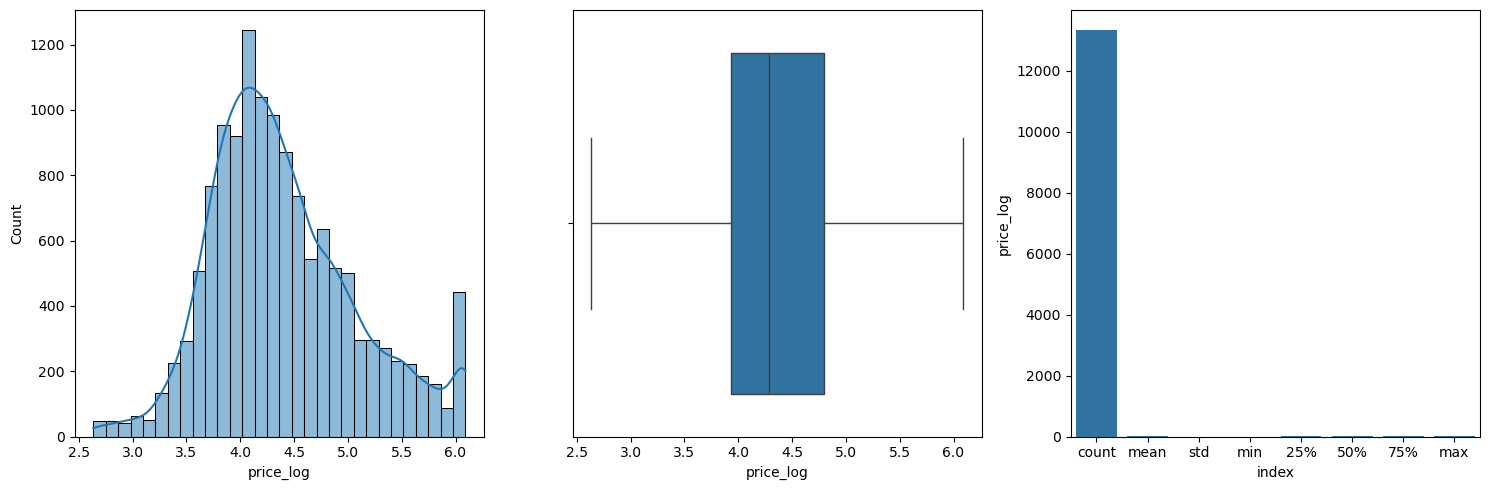

In [24]:
for col in numeric_col:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.histplot(data=data, x=col, bins=30, kde=True, ax=axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    sns.barplot(data=data[col].describe().reset_index(), x='index', y=col, ax=axs[2])
    
    plt.tight_layout()
    plt.show()

In [25]:
#Using LabelEncoder To transform the data
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=l.fit_transform(data[i])

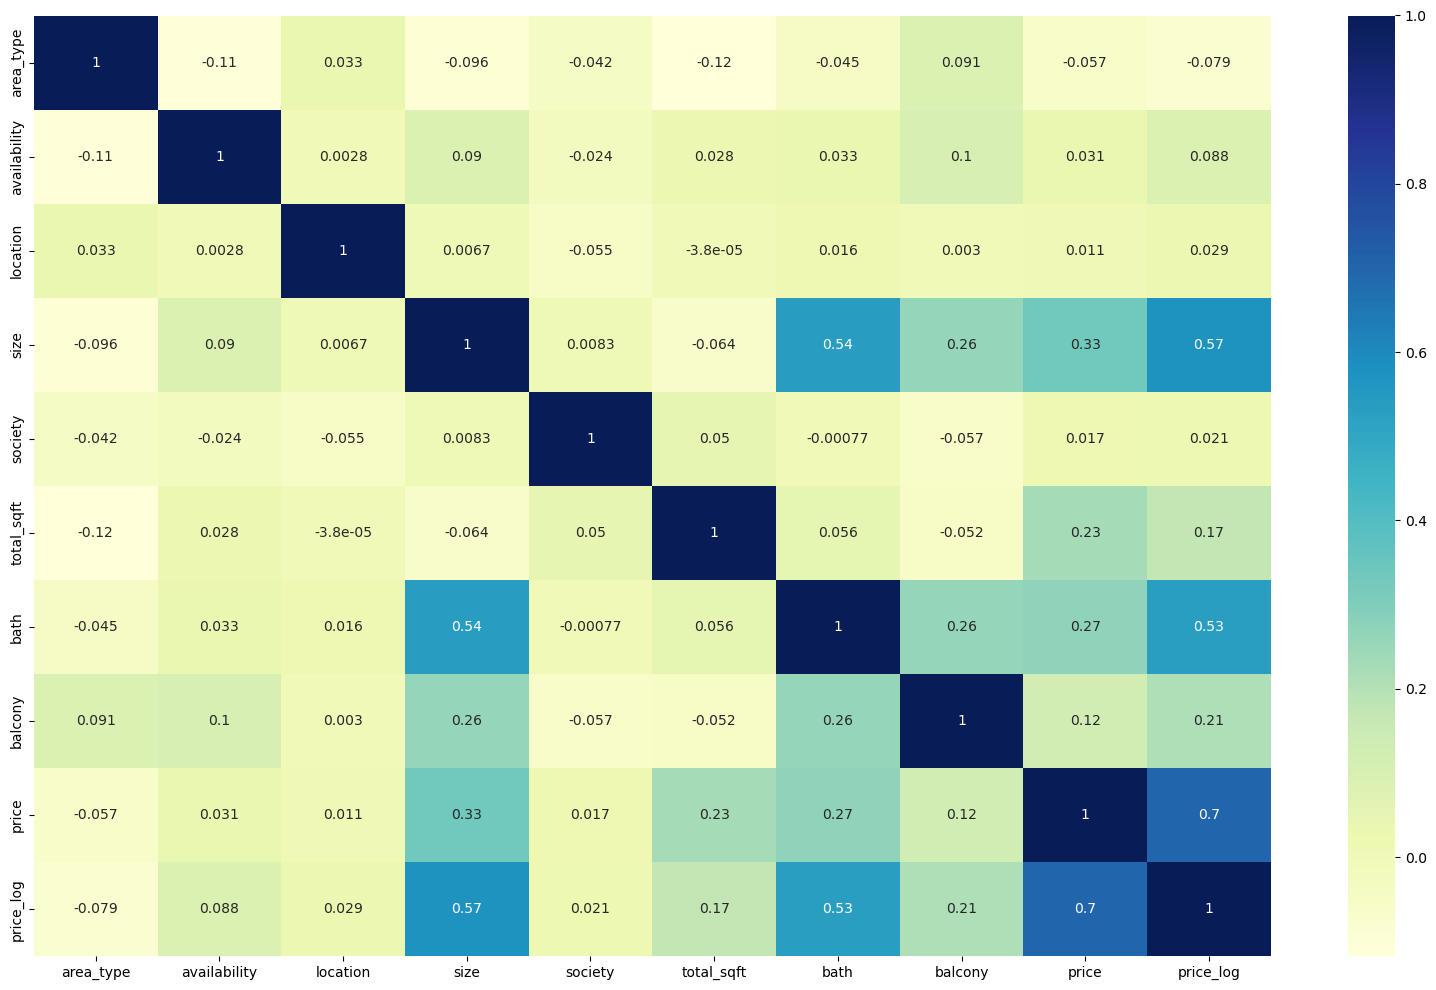

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

In [27]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_log
0,3,40,419,13,464,70,2.0,1.0,39.07,3.690628
1,2,80,317,19,2439,1288,2.0,3.0,120.00,4.795791
2,0,80,1180,16,108,514,2.0,3.0,62.00,4.143135
3,3,80,757,16,2186,602,3.0,1.0,95.00,4.564348
4,3,80,716,13,2208,239,2.0,1.0,51.00,3.951244


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

In [29]:
from sklearn.model_selection import train_test_split

# Features (all columns except price and price_log)
features = data.drop(['price', 'price_log'], axis=1)

# Target: log-transformed price for modeling
target = data['price_log']

# Split sizes
train_size = 0.7
test_size = 0.2
holdout_size = 0.1

# Step 1: split train and temp (test + holdout)
X_train, X_temp, y_train, y_temp = train_test_split(
    features, target, test_size=(test_size + holdout_size), random_state=42
)

# Step 2: split temp into test and holdout
X_test, X_holdout, y_test, y_holdout = train_test_split(
    X_temp, y_temp, test_size=(holdout_size / (test_size + holdout_size)), random_state=42
)

# Check the shapes
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)
print("Holdout:", X_holdout.shape, y_holdout.shape)

Train: (9323, 8) (9323,)
Test: (2664, 8) (2664,)
Holdout: (1333, 8) (1333,)


In [30]:
regressors = [
    LinearRegression,
    SVR,
    Lasso,
    Ridge,
    KNeighborsRegressor,
    DecisionTreeRegressor,
    RandomForestRegressor,
    LGBMRegressor
]

# Evaluate each model
for model in regressors:
    regressor = model()
    regressor.fit(X_train, y_train)
    
    # Predictions
    holdout_predictions = regressor.predict(X_holdout)
    test_predictions = regressor.predict(X_test)
    
    # RMSE calculation
    holdout_rmse = np.sqrt(mean_squared_error(y_holdout, holdout_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    
    # Print results
    print(f'RMSE for {model.__name__} on test set is {test_rmse:.4f}')
    print(f'RMSE for {model.__name__} on holdout set is {holdout_rmse:.4f}')
    print('-'*50)

RMSE for LinearRegression on test set is 0.5073
RMSE for LinearRegression on holdout set is 0.5170
--------------------------------------------------
RMSE for SVR on test set is 0.5276
RMSE for SVR on holdout set is 0.5592
--------------------------------------------------
RMSE for Lasso on test set is 0.5858
RMSE for Lasso on holdout set is 0.5980
--------------------------------------------------
RMSE for Ridge on test set is 0.5073
RMSE for Ridge on holdout set is 0.5170
--------------------------------------------------
RMSE for KNeighborsRegressor on test set is 0.4642
RMSE for KNeighborsRegressor on holdout set is 0.4865
--------------------------------------------------
RMSE for DecisionTreeRegressor on test set is 0.4138
RMSE for DecisionTreeRegressor on holdout set is 0.4392
--------------------------------------------------
RMSE for RandomForestRegressor on test set is 0.3144
RMSE for RandomForestRegressor on holdout set is 0.3274
---------------------------------------------

In [31]:
# Defining a helper function for tuning (Performing gridsearch)
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best RMSE (CV): {-grid_search.best_score_:.4f}")
    return grid_search.best_estimator_

In [32]:
# Gridsearch for Random Forest Regressor
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

best_rf = hyperparameter_tuning(RandomForestRegressor(random_state=42), rf_params, X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters for RandomForestRegressor: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE (CV): 0.3311


In [37]:
lgbm_params = {
    'num_leaves': [20, 31],
    'max_depth': [-1, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

best_lgbm = hyperparameter_tuning(LGBMRegressor(random_state=42), lgbm_params, X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 9323, number of used features: 8
[LightGBM] [Info] Start training from score 4.403652
Best Parameters for LGBMRegressor: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
Best RMSE (CV): 0.3228


In [38]:
# Evaluate both models
for model in [best_rf, best_lgbm]:
    test_pred = model.predict(X_test)
    holdout_pred = model.predict(X_holdout)

    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    holdout_rmse = np.sqrt(mean_squared_error(y_holdout, holdout_pred))

    print(f"\n{model.__class__.__name__} Results:")
    print(f"Test RMSE (log scale): {test_rmse:.4f}")
    print(f"Holdout RMSE (log scale): {holdout_rmse:.4f}")


RandomForestRegressor Results:
Test RMSE (log scale): 0.3157
Holdout RMSE (log scale): 0.3320

LGBMRegressor Results:
Test RMSE (log scale): 0.3006
Holdout RMSE (log scale): 0.3058


In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Reverse log-transform your predictions and true values
y_test_original = np.expm1(y_test)  # converts from log(price+1) back to price
y_pred_original = np.expm1(best_lgbm.predict(X_test))

# Compute RMSE on original scale
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print("RMSE (original price scale):", rmse_original)

# Compute NRMSE (Normalized RMSE)
# Option A: normalize by mean
nrmse_mean = rmse_original / np.mean(y_test_original)

# Option B: normalize by range
nrmse_range = rmse_original / (np.max(y_test_original) - np.min(y_test_original))

print("NRMSE (normalized by mean):", nrmse_mean)
print("NRMSE (normalized by range):", nrmse_range)

RMSE (original price scale): 46.89892486201372
NRMSE (normalized by mean): 0.4575198974624313
NRMSE (normalized by range): 0.10951713619780797
